In [1]:
!pip install -q efficientnet_pytorch torchmetrics gdown matplotlib datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:0

In [2]:
import os
import gdown
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [3]:
from datasets import load_dataset

ds = load_dataset("danjacobellis/chexpert")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.21k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

train-00000-of-00023.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00001-of-00023.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00002-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00003-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00004-of-00023.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00005-of-00023.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00006-of-00023.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

train-00007-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00008-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00009-of-00023.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00010-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00011-of-00023.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00012-of-00023.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

train-00013-of-00023.parquet:   0%|          | 0.00/485M [00:00<?, ?B/s]

train-00014-of-00023.parquet:   0%|          | 0.00/493M [00:00<?, ?B/s]

train-00015-of-00023.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

train-00016-of-00023.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

train-00017-of-00023.parquet:   0%|          | 0.00/524M [00:00<?, ?B/s]

train-00018-of-00023.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

train-00019-of-00023.parquet:   0%|          | 0.00/520M [00:00<?, ?B/s]

train-00020-of-00023.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00021-of-00023.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00022-of-00023.parquet:   0%|          | 0.00/516M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/12.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/223414 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/234 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/23 [00:00<?, ?it/s]

In [11]:
# these are the disease columns in your `ds["train"].column_names`
label_cols = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity",
    "Lung Lesion", "Edema", "Consolidation", "Pneumonia", "Atelectasis",
    "Pneumothorax", "Pleural Effusion", "Pleural Other", "Fracture", "Support Devices"
]

In [12]:
import torch
torch.backends.cudnn.benchmark = True

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# ImageNet‐style normalization
imagenet_stats = dict(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(**imagenet_stats),
])

class CheXpertTorchDS(Dataset):
    def __init__(self, hf_ds, label_cols, transform):
        self.ds = hf_ds
        self.labels = label_cols
        self.transform = transform

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        row = self.ds[idx]
        img = row["image"].convert("RGB")
        x = self.transform(img)
        # map codes → binary
        y = torch.tensor(
            [(1.0 if row[c] == 3 else 0.0) for c in self.labels],
            dtype=torch.float32
        )
        return x, y

from datasets import DatasetDict

# take e.g. 20 000 random examples
small_train = ds["train"].shuffle(seed=42).select(range(200000))
# small_val   = ds["validation"].shuffle(seed=42).select(range(1_000))

train_tds = CheXpertTorchDS(small_train, label_cols, transform)
val_tds = CheXpertTorchDS(ds["validation"], label_cols, transform)

train_loader = DataLoader(
    train_tds,
    batch_size=32,            # bump up until you hit ~14 GB on your T4
    shuffle=True,
    num_workers=8,            # use more workers for parallel I/O
    pin_memory=True,          # faster host→GPU transfers
    prefetch_factor=2,        # overlap data loading
    persistent_workers=True,  # keep workers alive between epochs
)
val_loader = DataLoader(val_tds,   batch_size=32, shuffle=False, num_workers=8, pin_memory=True, prefetch_factor=2, persistent_workers=True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [14]:
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

class BayesianEfficientNet(nn.Module):
    def __init__(self, model_name="efficientnet-b0", num_classes=14, p_drop=0.2):
        super().__init__()
        self.backbone = EfficientNet.from_pretrained(model_name)
        in_f = self.backbone._fc.in_features
        self.backbone._fc = nn.Identity()
        self.dropout = nn.Dropout(p=p_drop)
        self.head    = nn.Linear(in_f, num_classes)
    def forward(self, x):
        x = self.backbone(x)
        x = self.dropout(x)      # keeps dropout active at inference if .train()
        return self.head(x)

In [15]:
from sklearn.metrics import roc_auc_score

def validate(model, loader, criterion, device):
    model.eval()
    torch.backends.cudnn.benchmark = True

    total_loss = 0.0
    all_probs   = []
    all_labels  = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)

            # FP16 inference if you like
            with autocast():
                logits = model(imgs)
                loss   = criterion(logits, labels)

            total_loss += loss.item()
            probs = torch.sigmoid(logits)   # convert logits → [0,1]
            all_probs.append(probs.cpu())
            all_labels.append(labels.cpu())

    avg_loss = total_loss / len(loader)
    all_probs  = torch.cat(all_probs).numpy()   # shape [N, 14]
    all_labels = torch.cat(all_labels).numpy()  # shape [N, 14]

    # compute per-class AUC
    aucs = []
    for i, cls in enumerate(label_cols):
        try:
            auc = roc_auc_score(all_labels[:, i], all_probs[:, i])
        except ValueError:
            auc = float("nan")  # e.g. if only one class present
        aucs.append(auc)

    return avg_loss, dict(zip(label_cols, aucs)), all_probs, all_labels

In [16]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BayesianEfficientNet().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

from torch.cuda.amp import autocast, GradScaler

# 1. Create one scaler for the whole run
scaler = GradScaler()

for epoch in range(1,5):
    model.train()
    total_loss = 0.0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()

        # 2. Do forward + loss under autocast
        with autocast():
            logits = model(imgs)
            loss = criterion(logits, labels)

        # 3. Scale, backprop, unscale & step
        scaler.scale(loss).backward()   # scale gradients
        scaler.step(optimizer)          # unscales grads, calls optimizer.step()
        scaler.update()                 # update the scale for next iteration

        total_loss += loss.item()

    train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}: train loss = {train_loss:.4f}")

    model.eval()
    val_loss, val_aucs, val_probs, val_labels = validate(
        model, val_loader, criterion, device
    )

    print(
        f"Epoch {epoch} — "
        f"train loss: {train_loss:.4f} | "
        f"val loss: {val_loss:.4f}"
    )
    print(
        "Val AUCs:",
        ", ".join(f"{cls}:{auc:.3f}" for cls, auc in val_aucs.items())
    )

Loaded pretrained weights for efficientnet-b0


<ipython-input-16-b40ae6a0b418>:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-16-b40ae6a0b418>:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1: train loss = 0.2949


<ipython-input-15-4dd1ea7eb6e7>:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Epoch 1 — train loss: 0.2949 | val loss: 0.3991
Val AUCs: No Finding:0.853, Enlarged Cardiomediastinum:0.577, Cardiomegaly:0.803, Lung Opacity:0.907, Lung Lesion:0.253, Edema:0.888, Consolidation:0.896, Pneumonia:0.637, Atelectasis:0.786, Pneumothorax:0.814, Pleural Effusion:0.925, Pleural Other:0.953, Fracture:nan, Support Devices:0.936


<ipython-input-16-b40ae6a0b418>:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 2: train loss = 0.2820


<ipython-input-15-4dd1ea7eb6e7>:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Epoch 2 — train loss: 0.2820 | val loss: 0.3791
Val AUCs: No Finding:0.897, Enlarged Cardiomediastinum:0.570, Cardiomegaly:0.814, Lung Opacity:0.924, Lung Lesion:0.590, Edema:0.886, Consolidation:0.900, Pneumonia:0.722, Atelectasis:0.779, Pneumothorax:0.802, Pleural Effusion:0.913, Pleural Other:0.991, Fracture:nan, Support Devices:0.939


<ipython-input-16-b40ae6a0b418>:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 3: train loss = 0.2766


<ipython-input-15-4dd1ea7eb6e7>:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


Epoch 3 — train loss: 0.2766 | val loss: 0.3827
Val AUCs: No Finding:0.882, Enlarged Cardiomediastinum:0.575, Cardiomegaly:0.783, Lung Opacity:0.904, Lung Lesion:0.330, Edema:0.907, Consolidation:0.865, Pneumonia:0.782, Atelectasis:0.688, Pneumothorax:0.863, Pleural Effusion:0.914, Pleural Other:0.948, Fracture:nan, Support Devices:0.944


<ipython-input-16-b40ae6a0b418>:22: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 4: train loss = 0.2727


<ipython-input-15-4dd1ea7eb6e7>:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 4 — train loss: 0.2727 | val loss: 0.3841
Val AUCs: No Finding:0.872, Enlarged Cardiomediastinum:0.620, Cardiomegaly:0.789, Lung Opacity:0.910, Lung Lesion:0.657, Edema:0.870, Consolidation:0.899, Pneumonia:0.587, Atelectasis:0.825, Pneumothorax:0.822, Pleural Effusion:0.914, Pleural Other:0.910, Fracture:nan, Support Devices:0.943


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


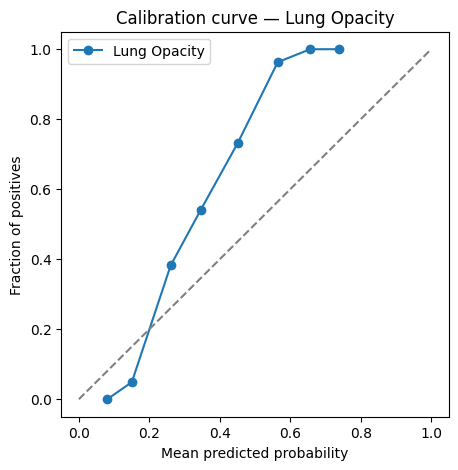

In [30]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

def plot_calibration(y_true, y_prob, cls_name, n_bins=10):
    prob_true, prob_pred = calibration_curve(
        y_true, y_prob, n_bins=n_bins, strategy="uniform"
    )
    plt.figure(figsize=(5,5))
    plt.plot(prob_pred, prob_true, marker="o", label=cls_name)
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.xlabel("Mean predicted probability")
    plt.ylabel("Fraction of positives")
    plt.title(f"Calibration curve — {cls_name}")
    plt.legend()
    plt.show()

# Example for “Pneumonia”
plot_calibration(
    val_labels[:, label_cols.index("Lung Opacity")],
    val_probs[:,  label_cols.index("Lung Opacity")],
    "Lung Opacity"
)

In [19]:
!pip install -q grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


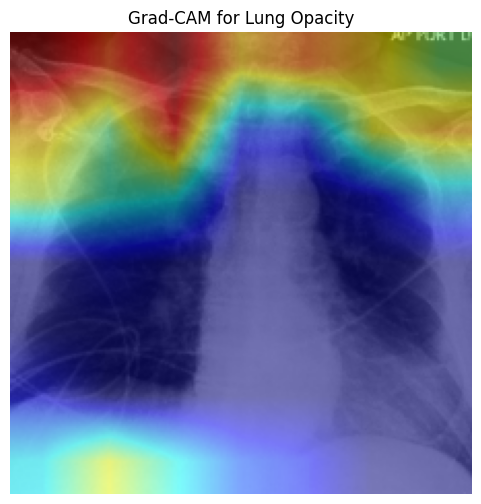

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# 1. Ensure model in eval mode (but DO NOT disable grads globally)
model.eval()

# 2. Grab one batch
imgs, labels = next(iter(val_loader))
imgs, labels = imgs.to(device), labels.to(device)

# 3. Predict to pick your class, inside no_grad
with torch.no_grad():
    logits   = model(imgs[:1])
    probs    = torch.sigmoid(logits)
    pred_cls = torch.argmax(probs, dim=1).item()

# 4. Instantiate GradCAM (no need for use_cuda)
target_layer = model.backbone._blocks[-1]._project_conv
cam = GradCAM(model=model, target_layers=[target_layer])

# 5. Wrap the CAM call in enable_grad to restore gradient tracking
with torch.enable_grad():
    # build the CAM target
    targets = [ClassifierOutputTarget(pred_cls)]
    # compute the mask (this will do an internal backward)
    grayscale_cam = cam(input_tensor=imgs[:1], targets=targets)  # shape [1, H, W]
cam_mask = grayscale_cam[0]

# 6. Reconstruct and overlay
orig = imgs[0].cpu().permute(1,2,0).numpy()
orig = (orig * imagenet_stats["std"] + imagenet_stats["mean"])
orig = np.clip(orig, 0, 1)

cam_image = show_cam_on_image(orig, cam_mask, use_rgb=True)
plt.figure(figsize=(6,6))
plt.imshow(cam_image)
plt.title(f"Grad-CAM for {label_cols[pred_cls]}")
plt.axis("off")
plt.show()

In [31]:
# save only the weights (recommended)
torch.save(model.state_dict(), "chexpert_bayesian_effnet.pth")

# Save the entire model (includes architecture)
torch.save(model, "chexpert_bayesian_effnet_full.pth")